# Crime Analysis in the city of Chicago for the year 2021

In this project I have downloaded, processed, and analyzed a large data set that contains crimes reported in the city of Chicago.

The data is available at [this location](https://data.cityofchicago.org/Public-Safety/Crimes-2021/dwme-t96c/about_data).


In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

In [3]:
#Defining location of dataset 
filepath = "~/library/ist652/fall2024/Assignments/Crimes_-_2021_20241002.csv"

In [4]:
#Loading the dataset
# a security warning will appear. You can ignore it.

crimes = pd.read_csv(filepath, parse_dates=[0], index_col=[0])

/tmp/ipykernel_5443/3319336883.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv(filepath, parse_dates=[0], index_col=[0])


In [5]:
crimes.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,...,36.0,19,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,...,50.0,13,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
12342615,JE202211,04/17/2021 03:20:00 PM,081XX S PRAIRIE AVE,0325,ROBBERY,VEHICULAR HIJACKING,RESIDENCE,True,False,631,...,6.0,44,03,1179448.0,1851073.0,2021,09/14/2023 03:41:59 PM,41.746626,-87.618032,"(41.746626309, -87.618031954)"
26262,JE366265,09/08/2021 04:45:00 PM,047XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CAR WASH,True,False,1131,...,24.0,25,01A,1144907.0,1896933.0,2021,09/14/2023 03:41:59 PM,41.873191,-87.743447,"(41.873191445, -87.743446563)"
13209581,JG422927,08/01/2021 12:00:00 AM,012XX E 78TH ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,411,...,8.0,45,17,NaN,NaN,2021,09/14/2023 03:43:09 PM,NaN,NaN,NaN


In [6]:
crimes.tail()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
13075828,JG264128,04/12/2021 09:00:00 AM,035XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1123,...,28.0,27,11,NaN,NaN,2021,05/18/2023 03:41:30 PM,NaN,NaN,NaN
13101397,JG294103,05/04/2021 12:00:00 PM,072XX S PRAIRIE AVE,1242,DECEPTIVE PRACTICE,COMPUTER FRAUD,RESIDENCE,False,False,323,...,6.0,69,11,NaN,NaN,2021,06/10/2023 03:41:12 PM,NaN,NaN,NaN
13120321,JG317146,10/05/2021 12:00:00 AM,007XX E 81ST ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,631,...,6.0,44,07,NaN,NaN,2021,06/27/2023 03:43:37 PM,NaN,NaN,NaN
13048321,JG160889,09/17/2021 12:00:00 AM,016XX N MASON AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,2531,...,29.0,25,17,NaN,NaN,2021,04/22/2023 03:40:07 PM,NaN,NaN,NaN
13092803,JG284184,08/23/2021 12:00:00 AM,036XX W SHAKESPEARE AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,True,2525,...,35.0,22,17,NaN,NaN,2021,06/02/2023 03:41:42 PM,NaN,NaN,NaN


In [7]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209357 entries, 25953 to 13092803
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Case Number           209357 non-null  object 
 1   Date                  209357 non-null  object 
 2   Block                 209357 non-null  object 
 3   IUCR                  209357 non-null  object 
 4   Primary Type          209357 non-null  object 
 5   Description           209357 non-null  object 
 6   Location Description  208117 non-null  object 
 7   Arrest                209357 non-null  bool   
 8   Domestic              209357 non-null  bool   
 9   Beat                  209357 non-null  int64  
 10  District              209357 non-null  int64  
 11  Ward                  209346 non-null  float64
 12  Community Area        209357 non-null  int64  
 13  FBI Code              209357 non-null  object 
 14  X Coordinate          202871 non-null  float64
 15 

In [8]:
crimes.dtypes

Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

## Few Data _Cleaning techniques

In [9]:
#Checking for missing values

crimes.isna().sum()

Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1240
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      11
Community Area             0
FBI Code                   0
X Coordinate            6486
Y Coordinate            6486
Year                       0
Updated On                 0
Latitude                6486
Longitude               6486
Location                6486
dtype: int64

#### There is some missing information in location and ward columns.

In [10]:
# We cannot use columns with space for codes like describe.
# Hence, I will convert the columns name having space in them with '_'

crimes.columns = crimes.columns.str.replace(' ', '_')
crimes.columns

Index(['Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type', 'Description',
       'Location_Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate', 'Y_Coordinate',
       'Year', 'Updated_On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [11]:
crimes.describe()

,Beat,District,Ward,Community_Area,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude
count,209357.000000,209357.000000,209346.000000,209357.000000,2.028710e+05,2.028710e+05,209357.0,202871.000000,202871.000000
mean,1151.149816,11.282470,23.143499,37.088500,1.165115e+06,1.885760e+06,2021.0,41.842109,-87.669615
std,698.703526,6.983591,13.904347,21.633944,1.655447e+04,3.201230e+04,0.0,0.088040,0.060253
min,111.000000,1.000000,1.000000,1.000000,1.091242e+06,1.813909e+06,2021.0,41.644608,-87.939733
25%,611.000000,6.000000,10.000000,23.000000,1.153355e+06,1.858101e+06,2021.0,41.765966,-87.712346
50%,1031.000000,10.000000,24.000000,32.000000,1.166967e+06,1.891283e+06,2021.0,41.857250,-87.662960
75%,1722.000000,17.000000,34.000000,55.000000,1.176822e+06,1.909222e+06,2021.0,41.906693,-87.626743
max,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951499e+06,2021.0,42.022548,-87.524529


In [12]:
crimes.Description.describe()

count     209357
unique       279
top       SIMPLE
freq       24594
Name: Description, dtype: object

# Data analysis 1 - Analysis of crime categories (arrest and primary type) over the months

### Analyzing the different categories of crimes recorded and creating a visual plot of the one with most meaning.

In [18]:
#Getting the arrest type count
arrest = crimes.groupby('Arrest')
df2 = arrest.size()
df2

Arrest
False    182819
True      26538
dtype: int64

In [19]:
#To get the total crime count
total_crime_count = crimes.Primary_Type.count()
total_crime_count

209357

#### There were only 26538 arrests made out of total crime of 209357

In [20]:
#Understanding the 'Description' column and no. of crimes in each category
desc = crimes.groupby('Description')
df = desc.size().sort_values(ascending=False)
df

Description
SIMPLE                                        24594
DOMESTIC BATTERY SIMPLE                       19628
$500 AND UNDER                                16033
OVER $500                                     13043
TO PROPERTY                                   12395
                                              ...  
DELIVER CANNABIS TO PERSON UNDER 18               1
SEXUAL RELATIONS IN FAMILY                        1
EDUCATIONAL INTIMIDAITON                          1
GAME/CARDS                                        1
DISCLOSE DOMESTIC VIOLENCE VICTIM LOCATION        1
Length: 279, dtype: int64

In [16]:
#Understanding the 'Primary_Type' column and no. of crimes in each category
prim = crimes.groupby('Primary_Type')
df1 = prim.size().sort_values(ascending=False)
df1

Primary_Type
THEFT                                40814
BATTERY                              40471
CRIMINAL DAMAGE                      25095
ASSAULT                              20343
DECEPTIVE PRACTICE                   17737
OTHER OFFENSE                        13956
MOTOR VEHICLE THEFT                  10604
WEAPONS VIOLATION                     8978
ROBBERY                               7920
BURGLARY                              6662
NARCOTICS                             5417
CRIMINAL TRESPASS                     3406
OFFENSE INVOLVING CHILDREN            1948
CRIMINAL SEXUAL ASSAULT               1521
SEX OFFENSE                           1110
HOMICIDE                               811
PUBLIC PEACE VIOLATION                 603
ARSON                                  529
STALKING                               370
INTERFERENCE WITH PUBLIC OFFICER       314
LIQUOR LAW VIOLATION                   184
CONCEALED CARRY LICENSE VIOLATION      173
INTIMIDATION                           12

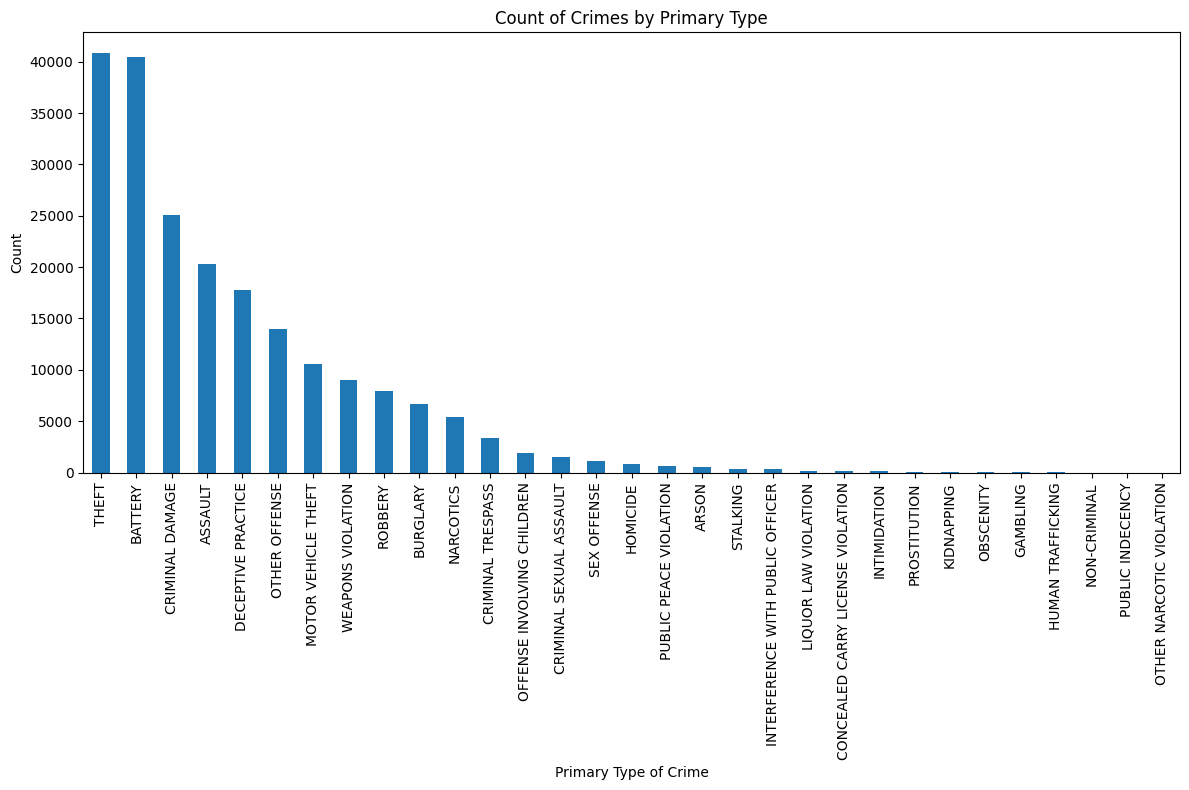

In [21]:
import matplotlib.pyplot as plt
# Plotting a bar chart for count of crimes by Primary Type

plt.figure(figsize=(12, 8))

df1.plot(kind='bar')

plt.xlabel('Primary Type of Crime')
plt.ylabel('Count')
plt.title('Count of Crimes by Primary Type')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

#### Theft and battery are among the top most crime types occuring in Chicago.

In [22]:
#Breaking down the date column to get analysis over time period
crimes['Date'] = pd.to_datetime(crimes['Date'])

#Extracting the month from 'Date' and creating a new 'Month' column
crimes['Month'] = crimes['Date'].dt.month

/tmp/ipykernel_5443/4220872105.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes['Date'] = pd.to_datetime(crimes['Date'])


In [23]:
#Primary type of crimes taken place over the months
months_primary = crimes.groupby(['Month','Primary_Type'])
primary_by_months = months_primary.size()
print(primary_by_months)

Month  Primary_Type                     
1      ARSON                                  39
       ASSAULT                              1339
       BATTERY                              2778
       BURGLARY                              486
       CONCEALED CARRY LICENSE VIOLATION      11
                                            ... 
12     ROBBERY                               901
       SEX OFFENSE                            83
       STALKING                               28
       THEFT                                3829
       WEAPONS VIOLATION                     620
Length: 333, dtype: int64


In [24]:
#Arrests taken place over the months
months_crime = crimes.groupby(['Month','Arrest'])
crimes_by_months = months_crime.size()
print(crimes_by_months)

Month  Arrest
1      False     13950
       True       2309
2      False     11075
       True       2061
3      False     13554
       True       2625
4      False     13431
       True       2239
5      False     15262
       True       2596
6      False     16432
       True       2435
7      False     16969
       True       2314
8      False     16576
       True       2035
9      False     17184
       True       2092
10     False     17410
       True       1988
11     False     15475
       True       1987
12     False     15501
       True       1857
dtype: int64


In [25]:
#Coverting 'primary_by_months' to a dataframe to plot it visually
crimes_by_months_df = crimes_by_months.reset_index(name='Count')

In [26]:
#Pivotting the data 
pivot_df = crimes_by_months_df.pivot(index='Month',columns='Arrest',values='Count')

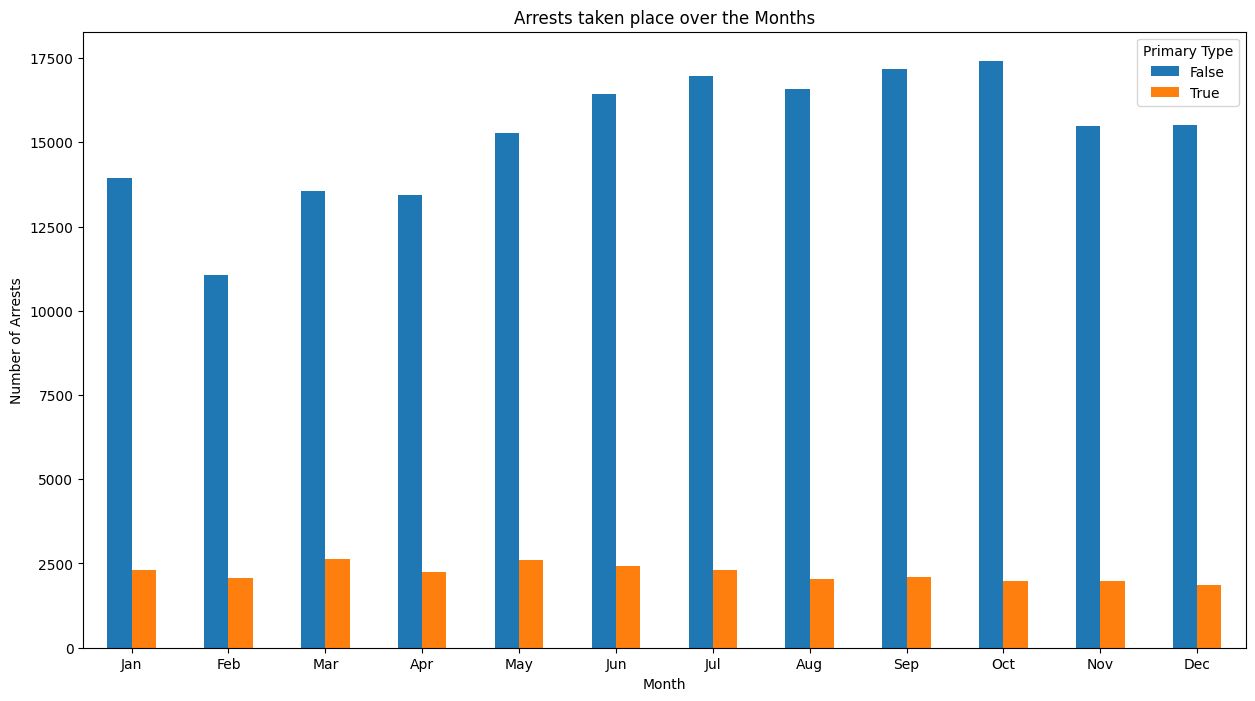

In [27]:

pivot_df.plot(kind='bar', stacked=False, figsize=(15, 8))

#Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.title('Arrests taken place over the Months')
plt.legend(title='Primary Type')
plt.xticks(rotation=0)

#To get months names instead of month numbers

import calendar

month_labels = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(ticks=range(12), labels=month_labels, rotation=0)

plt.show()

## Description of data analysis result 1

#### There were only 26538 arrests made out of total crime of 209357

#### Theft and battery are among the top most crime types occuring in Chicago.

#### It looked a bit complicated to plot the primary type of crimes over months as it had many different categories leading to too many bars for a month. Hence I plotted the different primary types count and plotted the arrests taken place over the months seperately

#### In the arrests taken place over the months graph, the difference in the number of arrests made vs not made is too large. The most arrests were made in the month of March while the lowest arrests recorded were in the month of December which could be due to the holiday season.

# Data analysis 2 - Analysis of crime by location

In [28]:
location_crimes = crimes.groupby('Location_Description')
location_crimes_df = location_crimes.size().sort_values(ascending=False)
location_crimes_df

Location_Description
STREET                                    52122
APARTMENT                                 44606
RESIDENCE                                 32404
SIDEWALK                                  12172
PARKING LOT / GARAGE (NON RESIDENTIAL)     6486
                                          ...  
CHA ELEVATOR                                  1
MOTEL                                         1
CHA LOBBY                                     1
FARM                                          1
SCHOOL YARD                                   1
Length: 128, dtype: int64

In [29]:
#Taking only the top 20 locations to plot on graph

location_crimes_df = location_crimes_df.iloc[:20]
location_crimes_df

Location_Description
STREET                                    52122
APARTMENT                                 44606
RESIDENCE                                 32404
SIDEWALK                                  12172
PARKING LOT / GARAGE (NON RESIDENTIAL)     6486
SMALL RETAIL STORE                         5402
ALLEY                                      4904
RESTAURANT                                 3719
RESIDENCE - PORCH / HALLWAY                3027
GAS STATION                                2966
COMMERCIAL / BUSINESS OFFICE               2926
OTHER (SPECIFY)                            2911
VEHICLE NON-COMMERCIAL                     2774
DEPARTMENT STORE                           2454
RESIDENCE - YARD (FRONT / BACK)            2430
RESIDENCE - GARAGE                         2366
GROCERY FOOD STORE                         1975
PARK PROPERTY                              1499
HOTEL / MOTEL                              1224
BAR OR TAVERN                              1149
dtype: int64

In [30]:
#Converting to df
location_crimes_df =location_crimes_df.reset_index()

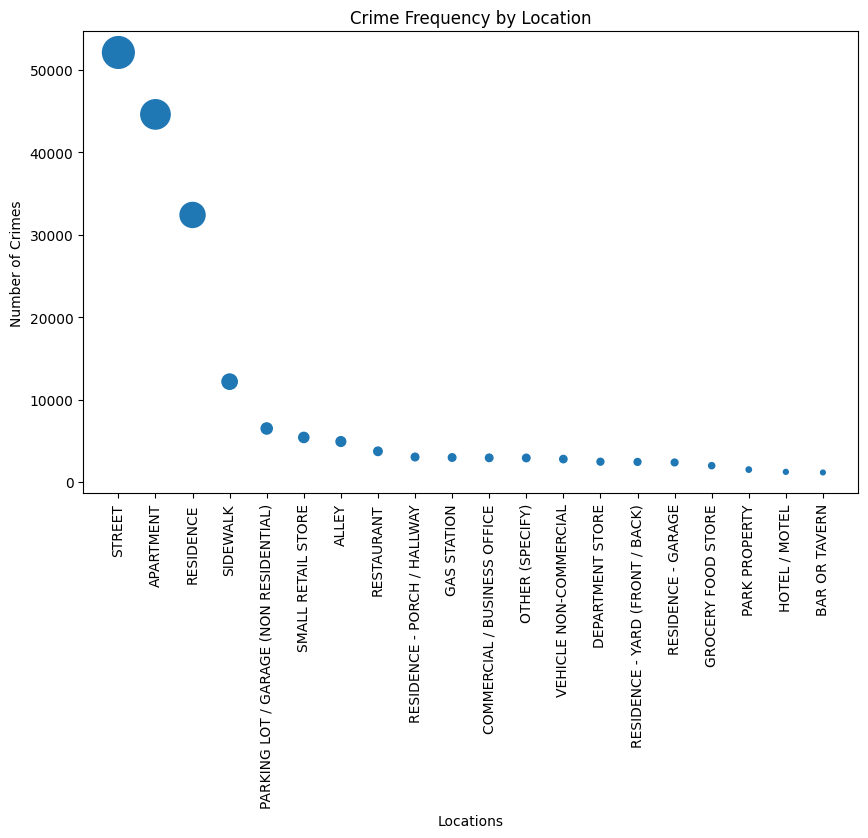

In [31]:
#Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(location_crimes_df.index, location_crimes_df[0], s=location_crimes_df[0]/100)

plt.title('Crime Frequency by Location')
plt.xlabel('Locations')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=location_crimes_df.index, labels=location_crimes_df['Location_Description'], rotation=90)
plt.show()


## Description of data analysis result 2

#### There are many locations that are added in the data. By plotting the top 20 locations, it makes the graph easier to plot.
#### The streets, apartment, residence and sidewalk contributes to highest number of crimes
#### The bigger the dots, higher the count of crimes for that location.